In [189]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE


# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors



In [190]:
import pandas as pd

# Assuming df1 is your big dataset and df2 is your smaller dataset
# Make sure both DataFrames have a column named 'id'
input_file = 'sterimol/IDPiDataset_noI.xlsx'

# Specify the column number (0-based index) containing strings
# Read the CSV file into a DataFrame
df1 = pd.read_excel(input_file)
input_file2 = 'sterimol/results_sterimol.csv'

df2 = pd.read_csv(input_file2)


# Merge the two DataFrames on the 'id' column
result = pd.merge(df1 ,df2, left_on='3,3â€™ Catalyst Substituent ', right_on='old_name', how='left')
# 'how' parameter specifies the type of merge - 'left' keeps all rows from df1
# You can also use 'right', 'outer', or 'inner' depending on your requirements

result.to_csv("sterimol/merged.csv")

In [191]:
result


,reaction,electrophile SMILES,nucleophile SMILES,ReactionSMILES,"3,3â€™ Catalyst Substituent",N Catalyst Substituent,catalyst SMILES,solvent,time (hours),temperature (Celsius),...,polarzz,mean_polar,HOMO,LUMO,biggest distance,major_axis,Axis_2,Axis_3,old_name,missing
0,1a,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,96,-78,...,100.170,189.93,-0.26066,-0.02697,11.427206,11.407403,5.399177,2.120202,c2ccc1ccccc1c2,c4ccc3c1ccccc1c2ccccc2c3c4
1,1b,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,COc2ccc1cc(C=O)ccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,192,-78,...,100.170,189.93,-0.26066,-0.02697,11.427206,11.407403,5.399177,2.120202,c2ccc1ccccc1c2,c4ccc3c1ccccc1c2ccccc2c3c4
2,1c,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1cc(Br)ccc1c2C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,192,-78,...,100.170,189.93,-0.26066,-0.02697,11.427206,11.407403,5.399177,2.120202,c2ccc1ccccc1c2,c4ccc3c1ccccc1c2ccccc2c3c4
3,1d,O=Cc1ccccc1,C=CC[Si](C)(C)C,O=Cc1ccccc1C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,48,-78,...,100.170,189.93,-0.26066,-0.02697,11.427206,11.407403,5.399177,2.120202,c2ccc1ccccc1c2,c4ccc3c1ccccc1c2ccccc2c3c4
4,1e,O=Cc1ccccc1F,C=CC[Si](C)(C)C,O=Cc1ccccc1FC=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2...,toluene,48,-60,...,100.170,189.93,-0.26066,-0.02697,11.427206,11.407403,5.399177,2.120202,c2ccc1ccccc1c2,c4ccc3c1ccccc1c2ccccc2c3c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,3e,CC/C=C(C)/C=O,C1=CCC=C1,CC/C=C(C)/C=OC1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,CH2Cl2,96,-100,...,119.968,245.02,-0.26240,-0.02488,13.541996,13.534199,5.547484,2.268856,c3ccc2ccc1ccccc1c2c3,Cc1cccc(C)c1C
273,3f,O=CC1=CCCCC1,C1=CCC=C1,O=CC1=CCCCC1C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,NaN,CH2Cl2,96,-100,...,119.968,245.02,-0.26240,-0.02488,13.541996,13.534199,5.547484,2.268856,c3ccc2ccc1ccccc1c2c3,Cc1cccc(C)c1C
274,3u,C/C=C(C)/C=O,C1=CCC=C1,C/C=C(C)/C=OC1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,NaN,CH2Cl2,72,-100,...,119.968,245.02,-0.26240,-0.02488,13.541996,13.534199,5.547484,2.268856,c3ccc2ccc1ccccc1c2c3,Cc1cccc(C)c1C
275,3v,O=CC1=CCCC1,C1=CCC=C1,O=CC1=CCCC1C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,CH2Cl2,72,-100,...,119.968,245.02,-0.26240,-0.02488,13.541996,13.534199,5.547484,2.268856,c3ccc2ccc1ccccc1c2c3,Cc1cccc(C)c1C


In [192]:
from common_functions import *

def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

electrophileSMILES = result['electrophile SMILES'].values
electrophiledescriptors = All_Mordred_descriptors(electrophileSMILES)
nucleophileSMILES = result['nucleophile SMILES'].values
nucleophiledescriptors = All_Mordred_descriptors(nucleophileSMILES)
"""threethreesubSMILES = result['3,3â€™ Catalyst Substituent '].values
threethreesubdescriptors = All_Mordred_descriptors(threethreesubSMILES)"""
nsubSMILES = result['N Catalyst Substituent'].values
nsubdescriptors = All_Mordred_descriptors(nsubSMILES)

100%|██████████| 277/277 [00:03<00:00, 76.62it/s] 


In [193]:
alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(nsubdescriptors, rsuffix='nsubdescriptors')
alldescriptors.to_csv('mordalldescriptors.csv', index=False)

In [194]:
result.columns

Index(['reaction', 'electrophile SMILES', 'nucleophile SMILES',
       'ReactionSMILES', '3,3â€™ Catalyst Substituent ',
       'N Catalyst Substituent', 'catalyst SMILES', 'solvent', 'time (hours)',
       'temperature (Celsius)', 'Temperature K', '% yield', 'e.r. 1', 'e.r. 2',
       'd.r.', 'ee', 'ddG', 'Conversion %', 'r.r. (regioisomeric ratio)',
       'reference', 'CatalystSMILES\n', 'Unnamed: 0', 'ster1', 'ster2',
       'ster3', 'Dih', 'Atom1_charge', 'Valance_atom1', 'Rydberg_atom1',
       'TotalNBO_atom1', 'Atom2_charge', 'Valance_atom2', 'Rydberg_atom2',
       'TotalNBO_atom2', 'polarxx', 'polarxy', 'polaryy', 'polarzx', 'polaryz',
       'polarzz', 'mean_polar', 'HOMO', 'LUMO', 'biggest distance',
       'major_axis', 'Axis_2', 'Axis_3', 'old_name', 'missing'],
      dtype='object')

In [195]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[cols_to_keep]
result_df

,ABCelectrophile,ABCGGelectrophile,SpAbs_Aelectrophile,SpMax_Aelectrophile,SpDiam_Aelectrophile,SpAD_Aelectrophile,SpMAD_Aelectrophile,LogEE_Aelectrophile,VE1_Aelectrophile,VE2_Aelectrophile,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,16.111254,2.342661,4.685322,16.111254,1.342604,3.419614,3.253611,0.271134,...,9.037771,36.999431,148.975834,14.897583,58,9,38.0,40.0,6.1250,1.5625
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,18.541403,2.372687,4.745374,18.541403,1.324386,3.565020,3.438327,0.245595,...,9.037771,36.999431,148.975834,14.897583,58,9,38.0,40.0,6.1250,1.5625
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,16.869942,2.365650,4.731300,16.869942,1.297688,3.498044,3.363488,0.258730,...,9.037771,36.999431,148.975834,14.897583,58,9,38.0,40.0,6.1250,1.5625
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,2.718002,0.339750,...,9.037771,36.999431,148.975834,14.897583,58,9,38.0,40.0,6.1250,1.5625
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,11.203558,2.221583,4.443167,11.203558,1.244840,3.090233,2.833014,0.314779,...,9.037771,36.999431,148.975834,14.897583,58,9,38.0,40.0,6.1250,1.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,7.878462,1.969616,3.939231,7.878462,1.125495,2.752840,2.458387,0.351198,...,10.356885,51.159578,298.966253,15.735066,436,36,92.0,112.0,12.3125,3.2500
273,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,2.718002,0.339750,...,9.682903,42.374286,198.972640,15.305588,136,18,56.0,64.0,8.1875,2.1250
274,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800,2.300795,0.383466,...,9.682903,42.374286,198.972640,15.305588,136,18,56.0,64.0,8.1875,2.1250
275,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,8.917367,2.151538,4.096394,8.917367,1.273910,2.849625,2.534374,0.362053,...,10.356885,51.159578,298.966253,15.735066,436,36,92.0,112.0,12.3125,3.2500


In [196]:
result_df
from sklearn.feature_selection import VarianceThreshold

VT = VarianceThreshold()
descriptors = VT.fit_transform(result_df)
len(descriptors)


Degrees of freedom <= 0 for slice.
All-NaN slice encountered


277

In [197]:
col_names = ['ster1', 'ster2', #'solvent',
       'ster3',  #'Atom1_charge', 'Valance_atom1', 
       'TotalNBO_atom1',# 'Atom2_charge', 'Valance_atom2',
       #'TotalNBO_atom2', 
       'polarxx',  'polaryy', 
       'polarzz', 'mean_polar', 'HOMO', 'LUMO','biggest distance',
       'major_axis', 'Axis_2', 'Axis_3']
DFT_data = result.loc[:,col_names]
DFT_data["std_pol"] = DFT_data[['polarxx','polaryy','polarzz']].std(axis=1)
DFT_data["max_pol"] = DFT_data[['polarxx','polaryy','polarzz']].max(axis=1)
DFT_data["Box_vol"] = DFT_data['major_axis']*DFT_data['Axis_2']*DFT_data['Axis_3']
DFT_data["Axis_2"] = DFT_data['Axis_2']/DFT_data['major_axis']
DFT_data["Axis_3"] = DFT_data['Axis_3']/DFT_data['major_axis']
"""DFT_data["max_pol2"] = pd.DataFrame(np.sort(DFT_data[['polarxx','polaryy','polarzz']].values)[:,-2], columns=['2nd-largest'])
DFT_data["max_pol3"] = DFT_data[['polarxx','polaryy','polarzz']].min(axis=1)"""
DFT_data = DFT_data.drop(['polarxx','polaryy','polarzz'],axis=1)
"""
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' parameter avoids multicollinearity
X_encoded = pd.DataFrame(encoder.fit_transform(DFT_data[['solvent']]), columns=encoder.get_feature_names_out(['solvent']))

# Concatenate the encoded columns with the original features
DFT_data = pd.concat([DFT_data.drop('solvent', axis=1), X_encoded], axis=1)"""

 # Drop the original string column


ddg= result.loc[:,'ddG']
ddg
#not 'dih', 'polarxy','polarzx', 'polaryz',

0      1.231712
1      1.066407
2      1.002518
3      0.896691
4      1.033884
         ...   
272    1.338303
273    1.338303
274    1.092856
275    1.195347
276    0.537292
Name: ddG, Length: 277, dtype: float64

In [198]:
DFT_data

,ster1,ster2,ster3,TotalNBO_atom1,mean_polar,HOMO,LUMO,biggest distance,major_axis,Axis_2,Axis_3,std_pol,max_pol,Box_vol
0,8.98,1.7,4.42,6.04967,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
1,8.98,1.7,4.42,6.04967,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
2,8.98,1.7,4.42,6.04967,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
3,8.98,1.7,4.42,6.04967,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
4,8.98,1.7,4.42,6.04967,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,11.15,1.7,4.49,6.04920,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
273,11.15,1.7,4.49,6.04920,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
274,11.15,1.7,4.49,6.04920,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
275,11.15,1.7,4.49,6.04920,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416


In [199]:
alldesc = pd.concat([pd.DataFrame(descriptors) ,DFT_data], axis=1)
alldesc

,0,1,2,3,4,5,6,7,8,9,...,mean_polar,HOMO,LUMO,biggest distance,major_axis,Axis_2,Axis_3,std_pol,max_pol,Box_vol
0,16.111254,2.342661,4.685322,16.111254,1.342604,3.419614,3.253611,0.271134,1.362087,50.648954,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
1,18.541403,2.372687,4.745374,18.541403,1.324386,3.56502,3.438327,0.245595,1.571457,67.138799,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
2,16.869942,2.36565,4.7313,16.869942,1.297688,3.498044,3.363488,0.25873,1.475343,56.85065,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
3,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,2.718002,0.33975,0.776754,23.560979,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
4,11.203558,2.221583,4.443167,11.203558,1.24484,3.090233,2.833014,0.314779,0.93598,28.156423,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,7.878462,1.969616,3.939231,7.878462,1.125495,2.75284,2.458387,0.351198,0.54283,16.738732,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
273,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,2.718002,0.33975,0.776754,23.560979,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
274,6.898979,1.931852,3.863703,6.898979,1.14983,2.5958,2.300795,0.383466,0.322429,12.261209,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
275,8.917367,2.151538,4.096394,8.917367,1.27391,2.849625,2.534374,0.362053,0.573272,19.372269,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416


In [200]:
param_grid = {
    'n_estimators': [10,20,50, 75, 100],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,6,8]
}

In [201]:
from sklearn.feature_selection import VarianceThreshold

def feature_reducer(df):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
    # Apply VarianceThreshold
    VT = VarianceThreshold()
    descriptors = VT.fit_transform(X)
    
    # Get the columns that are retained by VarianceThreshold
    columns_after_variance_threshold = X.columns[VT.get_support()]
    
    # Create a DataFrame after VarianceThreshold
    X_after_variance_threshold = X[columns_after_variance_threshold]

    # Calculate the correlation matrix for the DataFrame after VarianceThreshold
    correlation_matrix = X_after_variance_threshold.corr()

    # Set a correlation threshold
    correlation_threshold = 0.9  # You can adjust this based on your requirements

    # Create a mask to identify highly correlated features
    corr_mask = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1)

    # Identify the columns to keep (those not highly correlated)
    columns_to_keep = X_after_variance_threshold.columns[~corr_mask.any()]

    # Create the final filtered DataFrame with retained column names
    X_filtered = X_after_variance_threshold[columns_to_keep]

    return X_filtered



nucleophiledescriptors = feature_reducer(nucleophiledescriptors)
#threethreesubdescriptors = feature_reducer(threethreesubdescriptors)
nsubdescriptors = feature_reducer(nsubdescriptors)
electrophiledescriptors = feature_reducer(electrophiledescriptors)
#alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub').join(nsubdescriptors, rsuffix='nsubdescriptors')

alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(nsubdescriptors, rsuffix='nsubdescriptors')
alldescriptors = feature_reducer(alldescriptors)

Degrees of freedom <= 0 for slice.
All-NaN slice encountered


Degrees of freedom <= 0 for slice.
All-NaN slice encountered
Degrees of freedom <= 0 for slice.
All-NaN slice encountered


In [202]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[cols_to_keep]
non_numeric_columns = result_df.select_dtypes(exclude='number').columns
result_df = result_df.drop(non_numeric_columns, axis=1)
result_df


,nS,ATSC4dv,ATSC5dv,ATSC6dv,ATSC5d,ATSC7d,ATSC8d,ATSC1v,ATSC6v,ATSC8v,...,VSA_EState9nucleophile,piPC4,n4Ringnucleophile,n6Ring,n4ARingnucleophile,n6ARingnucleophile,RotRatio,JGI7,JGI9nucleophile,TSRW10nucleophile
0,0,-15.600000,11.280000,6.360000,-0.880000,1.820000,0.980000,3.962908e+01,36.746884,72.139239,...,-0.77527,1.945910,0,0,0,0,0.333333,0.0,0.0,33.343946
1,0,-21.652778,14.631944,-10.888889,-2.555556,0.555556,-0.666667,5.875203e+00,-182.093688,281.589421,...,-0.77527,1.945910,0,0,0,0,0.333333,0.0,0.0,33.343946
2,0,-14.664472,10.387215,7.572236,-0.500000,0.750000,1.125000,2.753977e+01,-154.184650,-116.130064,...,-0.77527,1.945910,0,0,0,0,0.333333,0.0,0.0,33.343946
3,0,-3.000000,0.000000,-4.000000,1.224490,0.000000,0.000000,-7.815970e-14,58.503620,0.000000,...,-0.77527,1.945910,0,0,0,0,0.333333,0.0,0.0,33.343946
4,0,-16.897959,-9.918367,-2.204082,1.790816,0.000000,0.000000,-9.947598e-14,72.080540,0.000000,...,-0.77527,1.945910,0,0,0,0,0.333333,0.0,0.0,33.343946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0,-22.892734,-6.110727,-0.415225,0.934256,0.000000,0.000000,-8.411238e+01,350.500913,0.000000,...,0.00000,2.833213,0,0,0,0,0.000000,0.0,0.0,41.004802
273,0,-11.333333,-9.333333,-8.888889,1.777778,0.000000,0.000000,3.126388e-13,45.031830,0.000000,...,0.00000,2.833213,0,0,0,0,0.000000,0.0,0.0,41.004802
274,0,-18.061224,1.653061,0.000000,1.224490,0.000000,0.000000,-8.087568e+01,0.000000,0.000000,...,0.00000,2.833213,0,0,0,0,0.000000,0.0,0.0,41.004802
275,0,-2.008889,-17.991111,0.000000,1.742222,0.000000,0.000000,-1.065814e-13,0.000000,0.000000,...,0.00000,2.833213,0,0,0,0,0.000000,0.0,0.0,41.004802


In [203]:
alldesc = pd.concat([result_df ,DFT_data], axis=1)
alldesc

,nS,ATSC4dv,ATSC5dv,ATSC6dv,ATSC5d,ATSC7d,ATSC8d,ATSC1v,ATSC6v,ATSC8v,...,mean_polar,HOMO,LUMO,biggest distance,major_axis,Axis_2,Axis_3,std_pol,max_pol,Box_vol
0,0,-15.600000,11.280000,6.360000,-0.880000,1.820000,0.980000,3.962908e+01,36.746884,72.139239,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
1,0,-21.652778,14.631944,-10.888889,-2.555556,0.555556,-0.666667,5.875203e+00,-182.093688,281.589421,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
2,0,-14.664472,10.387215,7.572236,-0.500000,0.750000,1.125000,2.753977e+01,-154.184650,-116.130064,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
3,0,-3.000000,0.000000,-4.000000,1.224490,0.000000,0.000000,-7.815970e-14,58.503620,0.000000,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
4,0,-16.897959,-9.918367,-2.204082,1.790816,0.000000,0.000000,-9.947598e-14,72.080540,0.000000,...,189.93,-0.26066,-0.02697,11.427206,11.407403,0.473305,0.185862,99.013021,296.137,130.584488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0,-22.892734,-6.110727,-0.415225,0.934256,0.000000,0.000000,-8.411238e+01,350.500913,0.000000,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
273,0,-11.333333,-9.333333,-8.888889,1.777778,0.000000,0.000000,3.126388e-13,45.031830,0.000000,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
274,0,-18.061224,1.653061,0.000000,1.224490,0.000000,0.000000,-8.087568e+01,0.000000,0.000000,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416
275,0,-2.008889,-17.991111,0.000000,1.742222,0.000000,0.000000,-1.065814e-13,0.000000,0.000000,...,245.02,-0.26240,-0.02488,13.541996,13.534199,0.409886,0.167639,141.535154,398.670,170.347416


In [204]:
xtrain, xtest, ytrain, ytest = train_test_split(alldesc, ddg, test_size=0.2, random_state=32)
trainedscaler = StandardScaler().fit(xtrain)
xtrainscaled = trainedscaler.transform(xtrain)
xtestscaled = trainedscaler.transform(xtest)


In [205]:
param_grid = {
    'n_estimators': [10,20,50, 75, 100],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,6]
}
model = RandomForestRegressor()

In [206]:
"""grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)"""

'grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5)\n\n# Fit the grid search to the data\ngrid_search.fit(xtrain, ytrain)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", best_params)'

In [207]:
nans=np.argwhere(xtrainscaled!=xtrainscaled)
np.unique(nans[:,0])

array([], dtype=int64)

0.5337951927330765

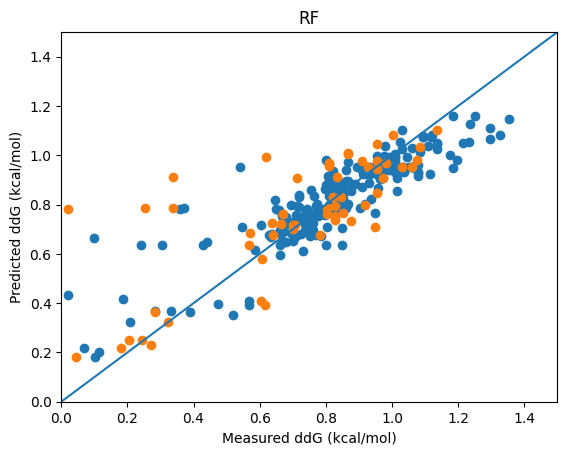

In [208]:
regressor = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=10).fit(xtrainscaled, np.log(ytrain+1))
ypred = regressor.predict(xtrainscaled)
xtestscaled = trainedscaler.transform(xtest)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(np.log(ytrain+1), ypred)
plt.scatter(np.log(ytest+1), ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
plt.xlim([0,1.5])
plt.plot([0,3],[0,3])
plt.ylim([0,1.5])
r2_score (np.log(ytest+1), ypredtest)

0.5052552830760626

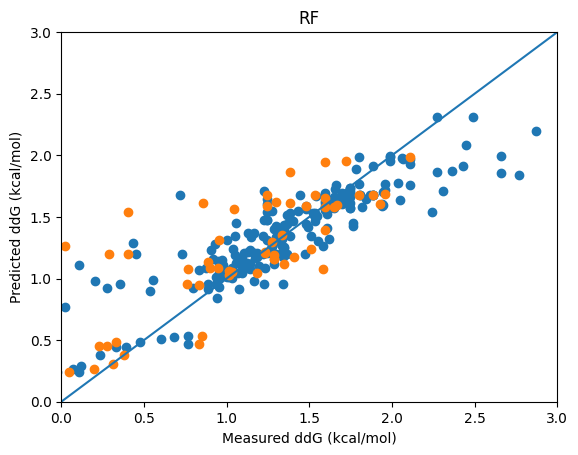

In [209]:
regressor = RandomForestRegressor(n_estimators=30, min_samples_split=5, min_samples_leaf=4, max_depth=20).fit(xtrainscaled, ytrain)
ypred = regressor.predict(xtrainscaled)
xtestscaled = trainedscaler.transform(xtest)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
plt.xlim([0,3])
plt.plot([0,3],[0,3])
plt.ylim([0,3])
r2_score (ytest, ypredtest)

In [210]:
feature_importances = regressor.feature_importances_

# Select top features
top_features = alldesc.columns[feature_importances.argsort()[::-1][:30]] 
top_features

Index(['ster3', 'Axis_3', 'Box_vol', 'ATSC6v', 'biggest distance', 'max_pol',
       'mean_polar', 'ATSC5dv', 'AATSC3d', 'std_pol', 'GATS2celectrophile',
       'EState_VSA4electrophile', 'MATS2delectrophile', 'LUMO',
       'EState_VSA4nucleophile', 'major_axis', 'VSA_EState5',
       'GATS3dnucleophile', 'MATS3c', 'PEOE_VSA7', 'ATSC3i', 'ATSC7d',
       'ATSC6dv', 'VSA_EState9nucleophile', 'BalabanJ', 'ster2', 'VSA_EState7',
       'TSRW10electrophile', 'HOMO', 'BCUTc-1h'],
      dtype='object')

Text(0.5, 1.0, 'RF')

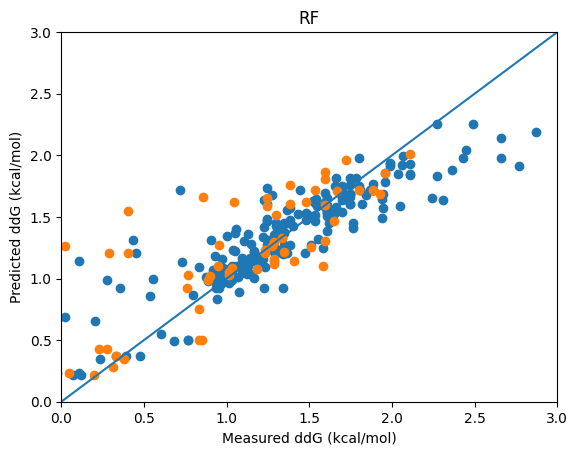

In [211]:
#xtrain, xtest, ytrain, ytest = train_test_split(alldesc[top_features], ddg, test_size=0.2, random_state=32)
trainedscaler = StandardScaler().fit(xtrain)
xtrainscaled = trainedscaler.transform(xtrain)
regressor = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=20).fit(xtrainscaled, ytrain)
ypred = regressor.predict(xtrainscaled)
xtestscaled = trainedscaler.transform(xtest)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlim([0,3])
plt.plot([0,3],[0,3])

plt.ylim([0,3])
plt.xlabel('Measured ddG (kcal/mol)')
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')

In [212]:
r2_score (ytest, ypredtest)


0.5253323651382

In [213]:
"""grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(xtrainscaled, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)"""

'grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5)\n\n# Fit the grid search to the data\ngrid_search.fit(xtrainscaled, ytrain)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", best_params)'

0.5053045608346369

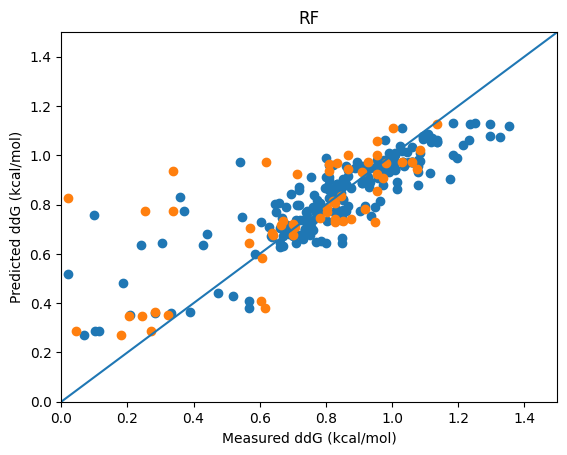

In [214]:
regressor = RandomForestRegressor(n_estimators=20, min_samples_split=5, min_samples_leaf=5, max_depth=10).fit(xtrainscaled, np.log(ytrain+1))
ypred = regressor.predict(xtrainscaled)
xtestscaled = trainedscaler.transform(xtest)
ypredtest = regressor.predict(xtestscaled)
plt.scatter(np.log(1+ytrain), ypred)
plt.scatter(np.log(ytest+1), ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,1.5])
plt.plot([0,3],[0,3])

plt.ylim([0,1.5])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score (np.log(1+ytest), ypredtest)


0.5372179281124956

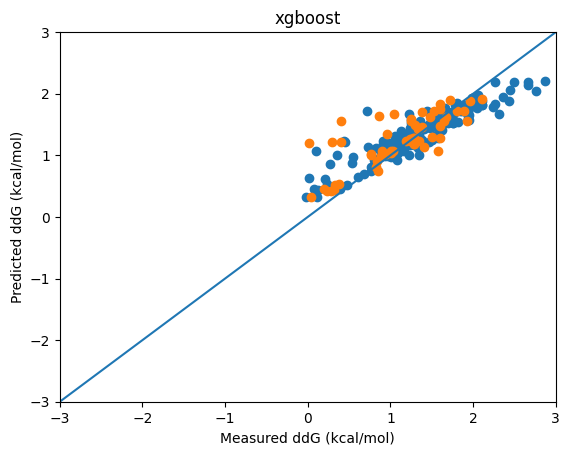

In [217]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.01, subsample=0.7,learning_rate = 0.03,
                max_depth = 5, alpha = 0.7, n_estimators = 100)
ytrainedscaler = StandardScaler().fit(np.array(ytrain).reshape(-1,1))
ytrainscaled = ytrainedscaler.transform(np.array(ytrain).reshape(-1,1))
ytestscaled = ytrainedscaler.transform(np.array(ytest).reshape(-1,1))
# Fit the model to the training data
xg_reg.fit(xtrainscaled, ytrain)
xtestscaled = trainedscaler.transform(xtest)
# Predict on the test set
ypred = xg_reg.predict(xtrainscaled)
ypredtest = xg_reg.predict(xtestscaled)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
r2_score (ytest, ypredtest)

[12:04:58] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


InvalidIndexError: (slice(None, None, None), 17)

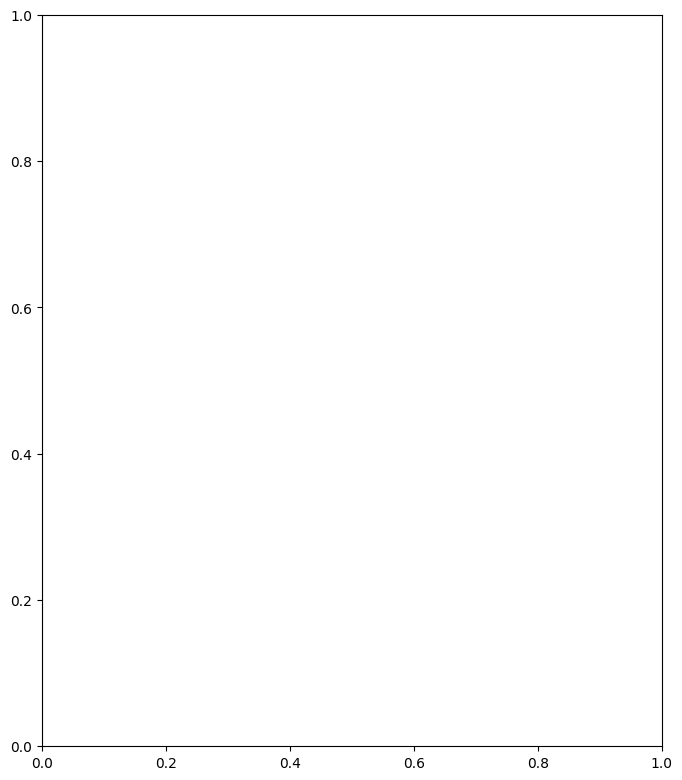

In [218]:
from sklearn.ensemble import GradientBoostingRegressor
import shap
# Create an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model to the training data
xg_reg.fit(xtrain, ytrain)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(xtest)

# Summary plot
shap.summary_plot(shap_values, xtest)

# Create a GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=70, learning_rate=0.03, max_depth=5, random_state=42)

# Fit the model to the training data
gb_reg.fit(xtrainscaled, ytrainscaled)
ypred = regressor.predict(xtrainscaled)
xtestscaled = trainedscaler.transform(xtest)
ypredtest = gb_reg.predict(xtestscaled)
# Explain the model's predictions using SHAP values
explainer = shap.Explainer(gb_reg)
shap_values = explainer.shap_values(xtest)


# Summary plot
#shap.summary_plot(shap_values, xtest)
r2_score(ytestscaled, ypredtest)

0.5360225397614183

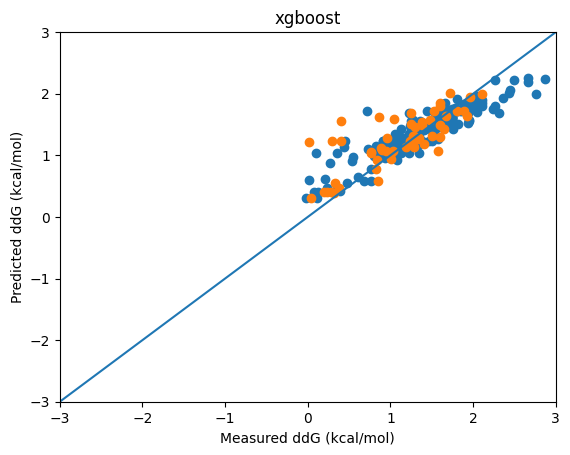

In [220]:

# Use Recursive Feature Elimination (RFE)
rfe = RFE(estimator=xg_reg, n_features_to_select=30)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, eta=0.01, subsample=0.7,learning_rate = 0.03,
                max_depth = 5, alpha = 0.5, n_estimators = 100)
xg_reg.fit(X_train_rfe, ytrain)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('xgboost')
r2_score (ytest, ypredtest)

0.5068142671649523

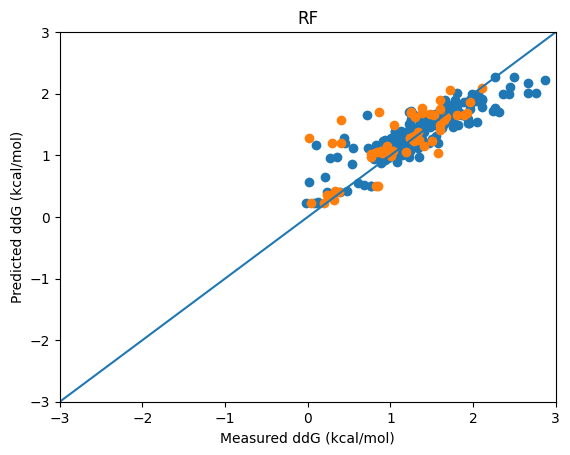

In [ ]:
rfe = RFE(estimator=xg_reg, n_features_to_select=50)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(xtrainscaled, ytrain)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=20)# Fit the model to the training data with selected features
xg_reg.fit(X_train_rfe, ytrain)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([-3,3])
plt.plot([-3,3],[-3,3])
plt.ylim([-3,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('RF')
r2_score(ytest ,ypredtest)

0.5019114320091895

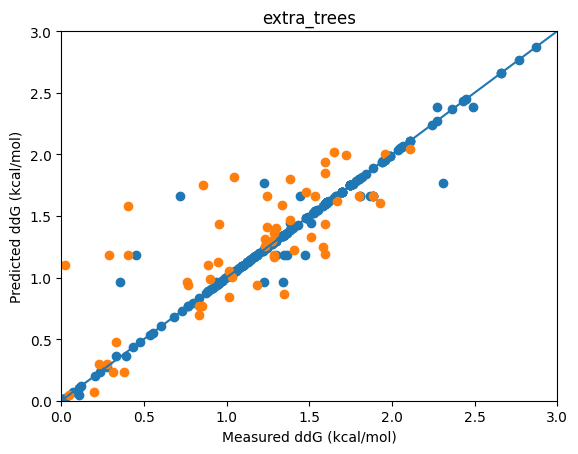

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees = ExtraTreesRegressor(n_estimators=30, random_state=42)

# Fit the model to the training data
extra_trees.fit(X_train_rfe, ytrain)

# Make predictions on the test set
ypred = extra_trees.predict(X_train_rfe)
ypredtest = extra_trees.predict(X_test_rfe)
# Evaluate the model
plt.scatter(ytrain, ypred)
plt.scatter(ytest, ypredtest)
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.plot([-3,3],[-3,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('extra_trees')
r2_score (ytest, ypredtest)